# 1. Cargar datos:

In [8]:
import pandas as pd

df = pd.read_csv('../data/EUR_USD_prices.csv')
df.head()


,date,1. open,2. high,3. low,4. close
0,2025-08-08,1.1665,1.1679,1.1628,1.1639
1,2025-08-07,1.1659,1.1698,1.1609,1.1665
2,2025-08-06,1.1571,1.1668,1.1563,1.1659
3,2025-08-05,1.1570,1.1587,1.1525,1.1574
4,2025-08-04,1.1577,1.1596,1.1547,1.1570


# 2. Limpieza para datos de precios Alpha Vantage

In [9]:
def limpiar_datos_alpha_vantage(ruta_csv):
    import pandas as pd

    # Cargar datos
    df = pd.read_csv(ruta_csv)

    # Renombrar columnas
    df.rename(columns={
        'date': 'fecha',
        '1. open': 'apertura',
        '2. high': 'maximo',
        '3. low': 'minimo',
        '4. close': 'cierre'
    }, inplace=True)

    # Convertir fecha a datetime y establecer como índice
    df['fecha'] = pd.to_datetime(df['fecha'])
    df.set_index('fecha', inplace=True)

    # Ordenar por fecha (por si acaso)
    df.sort_index(inplace=True)

    return df


# 2. Visualizar precios

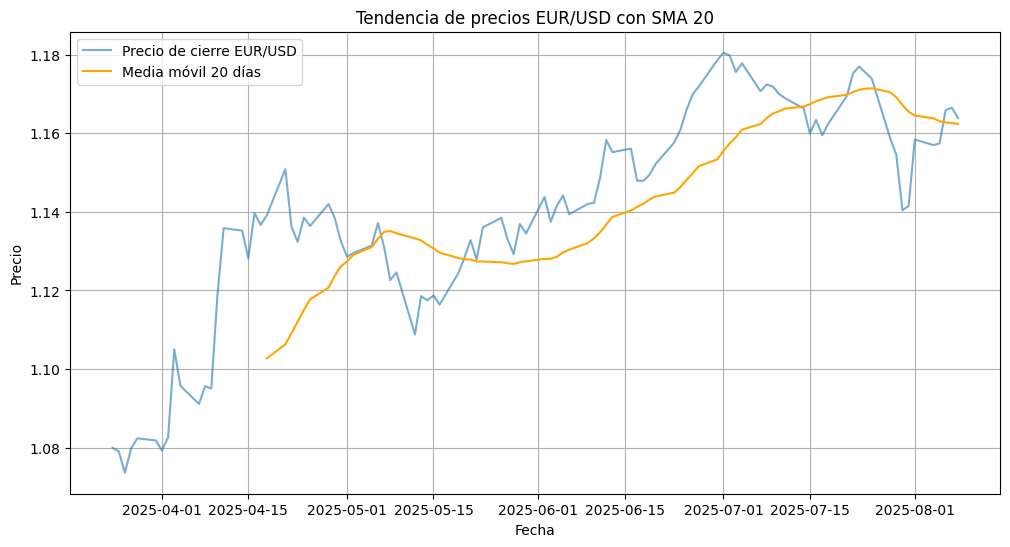

In [11]:
# Cargar y limpiar datos
df = limpiar_datos_alpha_vantage('../data/EUR_USD_prices.csv')

# Calcular media móvil de 20 días
df['sma_20'] = df['cierre'].rolling(window=20).mean()

# Graficar precios de cierre y media móvil
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['cierre'], label='Precio de cierre EUR/USD', alpha=0.6)
plt.plot(df['sma_20'], label='Media móvil 20 días', color='orange')
plt.title('Tendencia de precios EUR/USD con SMA 20')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()


## SMA de 50 y 100 días, Bandas de Bollinger, MACD y RSI
A continuación se calculan y visualizan indicadores técnicos populares para comparar tendencias y detectar señales de trading.

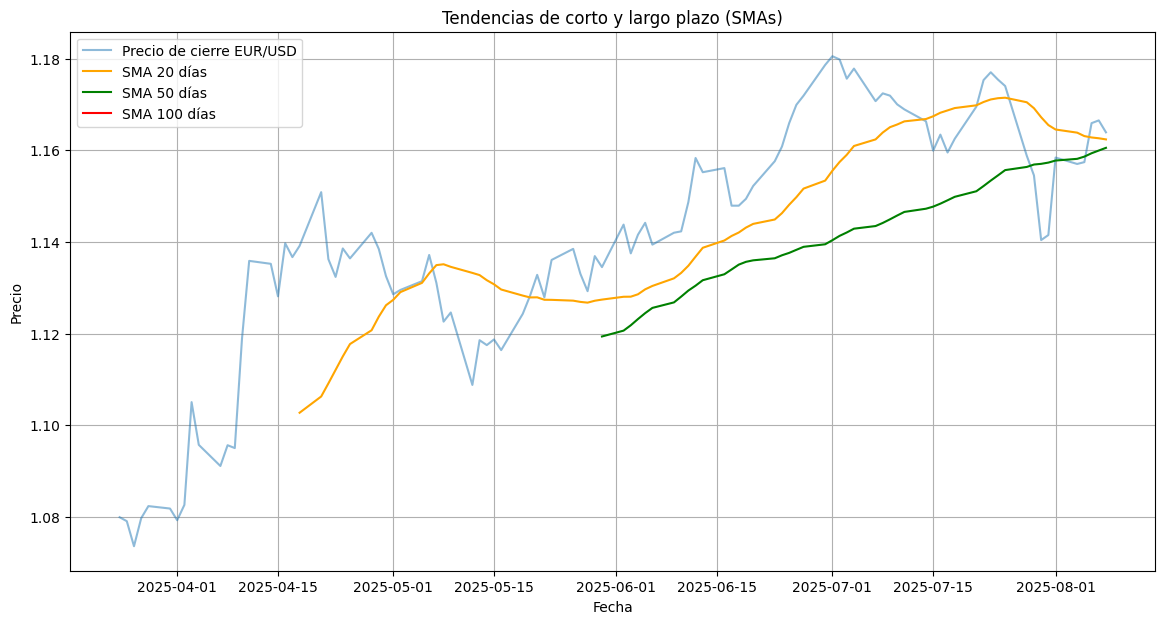

In [12]:
# Calcular SMA de 50 y 100 días
df['sma_50'] = df['cierre'].rolling(window=50).mean()
df['sma_100'] = df['cierre'].rolling(window=100).mean()

# Graficar precios de cierre y SMAs
plt.figure(figsize=(14,7))
plt.plot(df['cierre'], label='Precio de cierre EUR/USD', alpha=0.5)
plt.plot(df['sma_20'], label='SMA 20 días', color='orange')
plt.plot(df['sma_50'], label='SMA 50 días', color='green')
plt.plot(df['sma_100'], label='SMA 100 días', color='red')
plt.title('Tendencias de corto y largo plazo (SMAs)')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

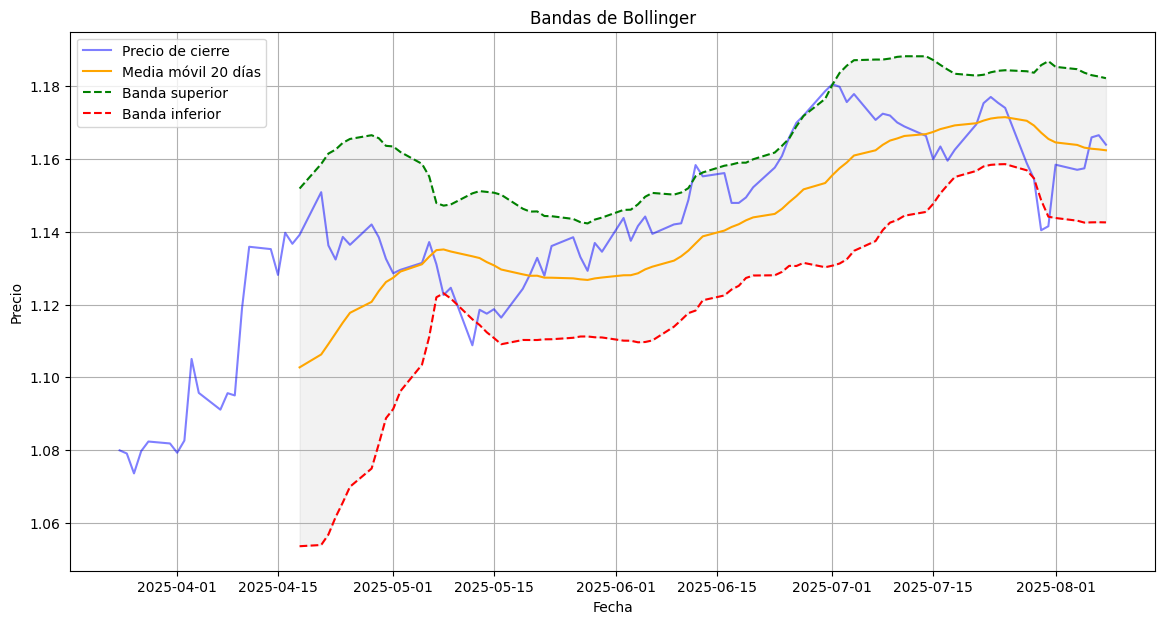

In [13]:
# Calcular Bandas de Bollinger (20 días, 2 desviaciones estándar)
window = 20
df['bollinger_mid'] = df['cierre'].rolling(window=window).mean()
df['bollinger_std'] = df['cierre'].rolling(window=window).std()
df['bollinger_upper'] = df['bollinger_mid'] + 2 * df['bollinger_std']
df['bollinger_lower'] = df['bollinger_mid'] - 2 * df['bollinger_std']

# Graficar precios de cierre y Bandas de Bollinger
plt.figure(figsize=(14,7))
plt.plot(df['cierre'], label='Precio de cierre', color='blue', alpha=0.5)
plt.plot(df['bollinger_mid'], label='Media móvil 20 días', color='orange')
plt.plot(df['bollinger_upper'], label='Banda superior', color='green', linestyle='--')
plt.plot(df['bollinger_lower'], label='Banda inferior', color='red', linestyle='--')
plt.fill_between(df.index, df['bollinger_lower'], df['bollinger_upper'], color='gray', alpha=0.1)
plt.title('Bandas de Bollinger')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

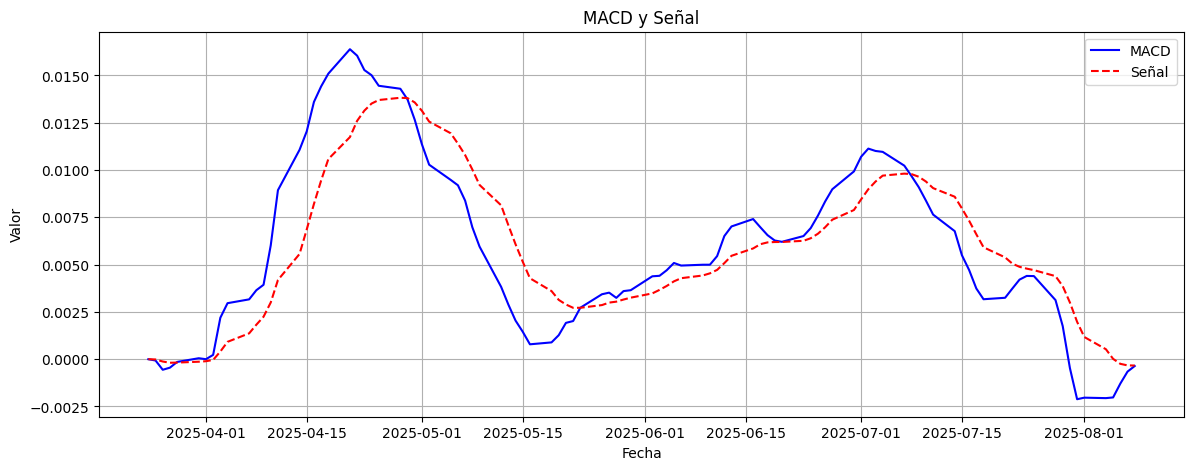

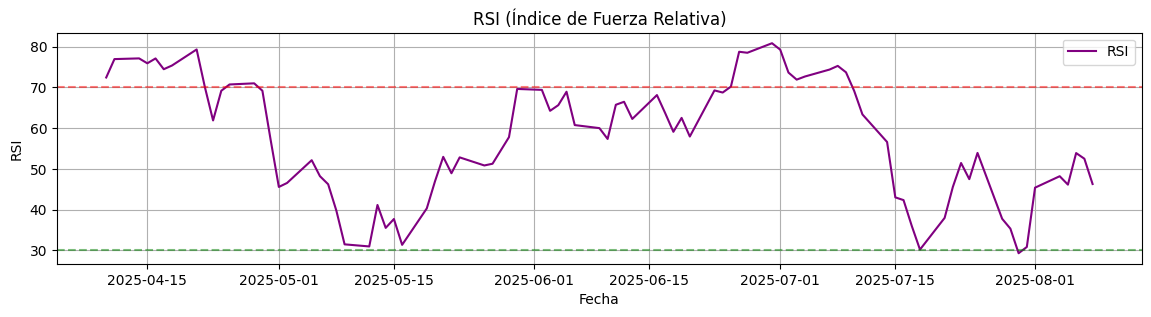

In [14]:
# Calcular MACD y RSI
def calcular_macd(df, col='cierre', short=12, long=26, signal=9):
    ema_short = df[col].ewm(span=short, adjust=False).mean()
    ema_long = df[col].ewm(span=long, adjust=False).mean()
    macd = ema_short - ema_long
    signal_line = macd.ewm(span=signal, adjust=False).mean()
    return macd, signal_line

def calcular_rsi(df, col='cierre', window=14):
    delta = df[col].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calcular MACD y señal
df['macd'], df['macd_signal'] = calcular_macd(df)

# Calcular RSI
df['rsi'] = calcular_rsi(df)

# Graficar MACD
plt.figure(figsize=(14,5))
plt.plot(df['macd'], label='MACD', color='blue')
plt.plot(df['macd_signal'], label='Señal', color='red', linestyle='--')
plt.title('MACD y Señal')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

# Graficar RSI
plt.figure(figsize=(14,3))
plt.plot(df['rsi'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', alpha=0.5)
plt.axhline(30, color='green', linestyle='--', alpha=0.5)
plt.title('RSI (Índice de Fuerza Relativa)')
plt.xlabel('Fecha')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()